## Open and look at the data

In [1]:
import pandas as pd

In [2]:
initial_dataset = '/home/anna/Documents/Diploma/topics_with_statistics/AN-1090-steps-stats-with-texts-for-Readability (bigger statistics).csv'

In [3]:
df_all = pd.read_csv(initial_dataset)

In [4]:
df_all.head()

,step_id,is_theory,last_3_month_completion_rate,last_3_month_avg_like,last_3_month_completed_step_users_count,last_3_month_likes_count,last_year_completion_rate,last_year_avg_like,last_year_completed_step_users_count,last_year_likes_count,seconds_to_complete,last_3_month_topic_completion_rate,last_3_month_completed_topic_users_count,last_year_topic_completion_rate,last_year_completed_topic_users_count,text,back_to_theory_times_per_user_session_avg_last_3_month,back_to_theory_users_%_last_3_month,back_to_theory_times_per_user_session_avg_last_year,back_to_theory_users_%_last_year
0,4660,0,0.95,1.59,494.0,78.0,0.96,1.51,1394.0,180.0,71.11,NaN,NaN,NaN,NaN,"""<p>Select correct code snippets with loops.</...",NaN,NaN,NaN,NaN
1,13289,0,0.94,1.64,148.0,11.0,0.95,1.87,629.0,47.0,32.23,NaN,NaN,NaN,NaN,"""<p><p>Complete the <code class=\""language-jav...",NaN,NaN,NaN,NaN
2,13147,0,0.95,2.00,21.0,4.0,0.93,1.41,116.0,17.0,37.22,NaN,NaN,NaN,NaN,"""<p><a target=\""_blank\"" href=\""https://www.dr...",NaN,NaN,NaN,NaN
3,5090,0,1.00,1.81,416.0,32.0,0.99,1.62,1569.0,87.0,28.19,NaN,NaN,NaN,NaN,"""<p>If you rely on some dependency only during...",NaN,NaN,NaN,NaN
4,12941,0,0.97,1.60,30.0,5.0,0.89,1.24,332.0,38.0,66.20,NaN,NaN,NaN,NaN,"""<p>What is the term for accessing a database ...",NaN,NaN,NaN,NaN


In [5]:
topics_dataset = '/home/anna/Documents/Diploma/code/new_cleaned/cleaned_topics_all.csv'

In [6]:
df_topics = pd.read_csv(topics_dataset)

In [7]:
df_topics.head()

,step_id,is_theory,text,seconds_to_complete,last_3_month_completion_rate,last_3_month_completed_step_users_count,last_3_month_avg_like,last_3_month_likes_count,last_3_month_topic_completion_rate,last_3_month_completed_topic_users_count,back_to_theory_times_per_user_session_avg_last_3_month,back_to_theory_users_%_last_3_month,cleaned_texts,num_headings,symbols_in_snippets
0,12357,1,"""<h5 id=\""introduction\""> Introduction</h5>\n\...",603.45,0.56,40.0,2.00,10.0,0.90,35.0,1.43,67.21,""" *heading* So far you have learned quite a lo...",6,790
1,12691,1,"""<p>JavaScript was originally developed as a l...",253.21,0.87,884.0,1.72,79.0,0.96,844.0,0.34,24.43,"""JavaScript was originally developed as a lang...",5,35
2,8112,1,"""<p>We've already learned what annotations are...",486.94,0.45,50.0,1.57,7.0,0.89,49.0,1.00,69.41,"""We've already learned what annotations are an...",3,1506
3,7892,1,"""<h5>Introduction</h5>\n\n<p>You often hear pe...",542.73,0.72,60.0,2.00,5.0,0.91,58.0,0.33,26.39,""" *heading* You often hear people speak about ...",5,0
4,15809,1,"""<h5>Introduction</h5>\n\n<p>When you have alr...",556.76,0.43,43.0,1.40,10.0,0.91,53.0,0.93,50.88,""" *heading* When you have already learned the ...",5,409


In [8]:
df_all.shape  # both tasks and theories

(13026, 20)

In [9]:
df_topics.shape  # only theories

(1318, 15)

In [10]:
# topics wiht >20 completions
topics_20_completions = df_topics.drop(df_topics[df_topics.last_3_month_completed_step_users_count < 20].index)
topics_20_completions.shape

(1064, 15)

In [11]:
# topics with >20 likes
topics_20_likes = df_topics.drop(df_topics[df_topics.last_3_month_likes_count < 20].index)
topics_20_likes.shape

(611, 15)

## Distributions of statistical features for topics

In [12]:
import matplotlib.pyplot as plt

In [13]:
import numpy as np

In [14]:
topics_20_completions.columns

Index(['step_id', 'is_theory', 'text', 'seconds_to_complete',
       'last_3_month_completion_rate',
       'last_3_month_completed_step_users_count', 'last_3_month_avg_like',
       'last_3_month_likes_count', 'last_3_month_topic_completion_rate',
       'last_3_month_completed_topic_users_count',
       'back_to_theory_times_per_user_session_avg_last_3_month',
       'back_to_theory_users_%_last_3_month', 'cleaned_texts', 'num_headings',
       'symbols_in_snippets'],
      dtype='object')

In [15]:
plt.rcParams["figure.figsize"] = (20, 3)

In [16]:
def plot_parameter(df, column_name, ticks, bins=300):
    plt.hist(df[column_name], bins)
    start_range = min(0, round(min(df[column_name]), int(ticks*10)))
    end_range = max(df[column_name])+ticks
    plt.xticks(np.arange(start_range, end_range, ticks))
    plt.title(column_name)
    plt.show()

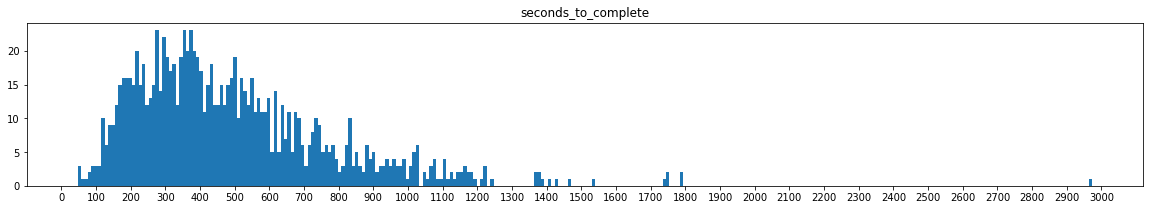

In [17]:
plot_parameter(topics_20_completions, 'seconds_to_complete', ticks=100, bins=300)

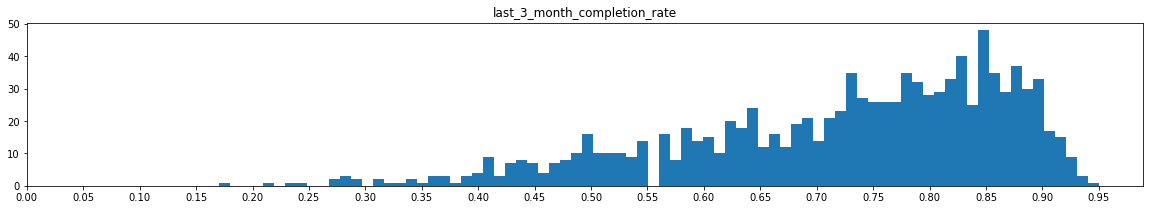

In [18]:
plot_parameter(topics_20_completions, 'last_3_month_completion_rate', ticks=0.05, bins=80)

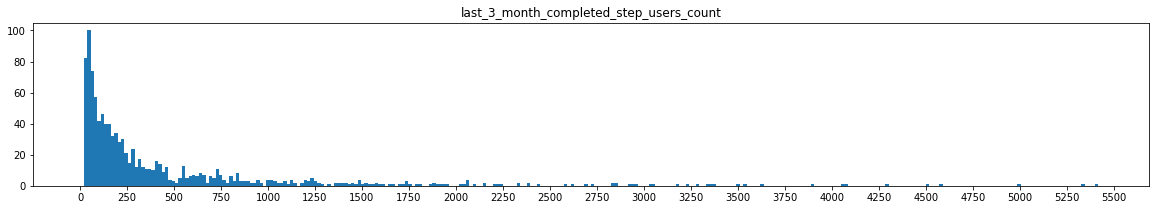

In [19]:
plot_parameter(topics_20_completions, 'last_3_month_completed_step_users_count', ticks=250, bins=300)

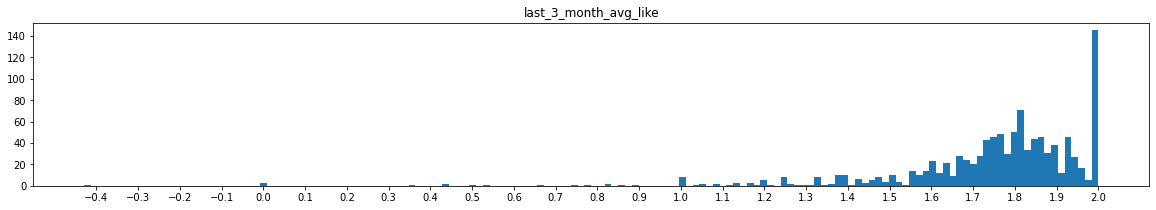

In [20]:
plot_parameter(topics_20_completions, 'last_3_month_avg_like', ticks=0.1, bins=150)

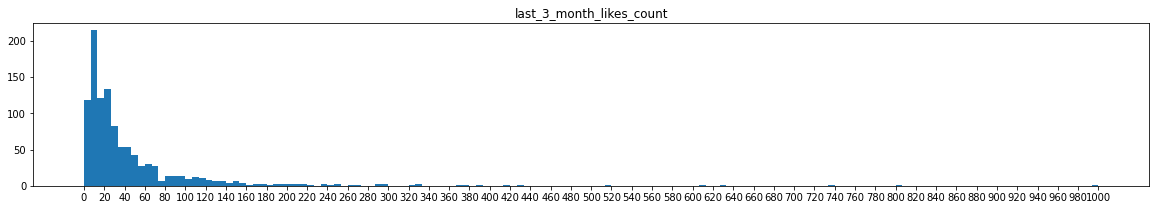

In [21]:
plot_parameter(topics_20_completions, 'last_3_month_likes_count', ticks=20, bins=150)

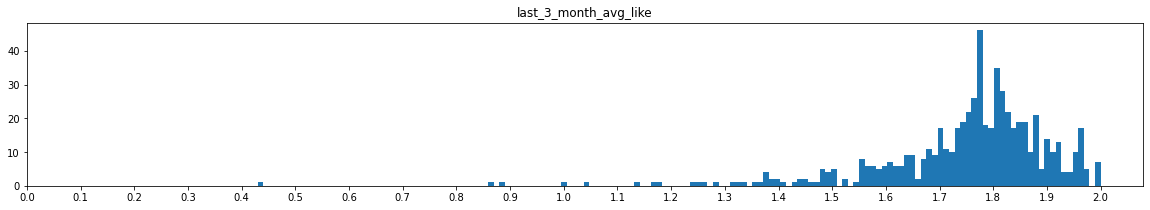

In [22]:
# now only for topics with > 20 likes
plot_parameter(topics_20_likes, 'last_3_month_avg_like', ticks=0.1, bins=150)

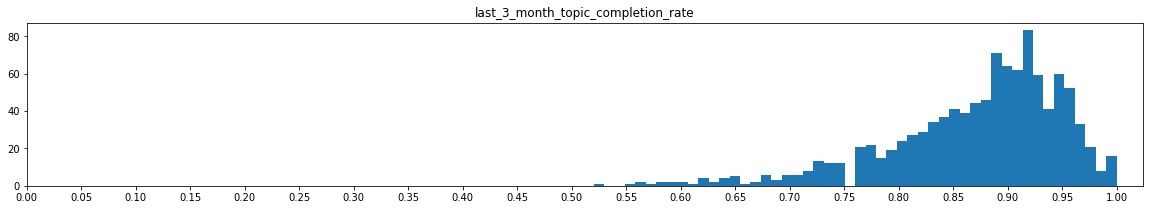

In [23]:
plot_parameter(topics_20_completions, 'last_3_month_topic_completion_rate', ticks=0.05, bins=50)

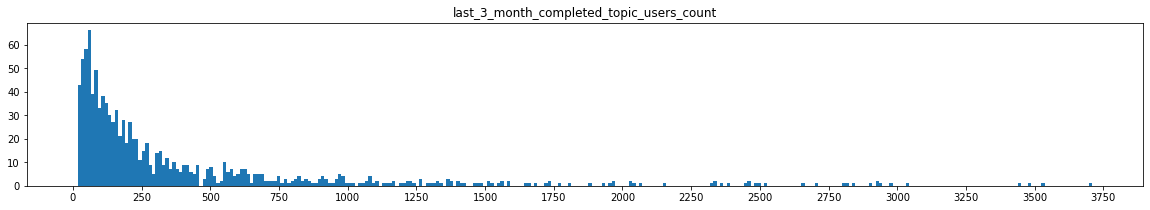

In [24]:
plot_parameter(topics_20_completions, 'last_3_month_completed_topic_users_count', ticks=250, bins=300)

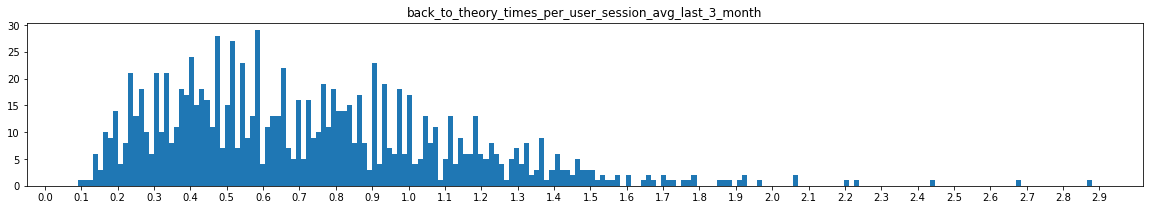

In [25]:
plot_parameter(topics_20_completions, 'back_to_theory_times_per_user_session_avg_last_3_month', ticks=0.1, bins=200)

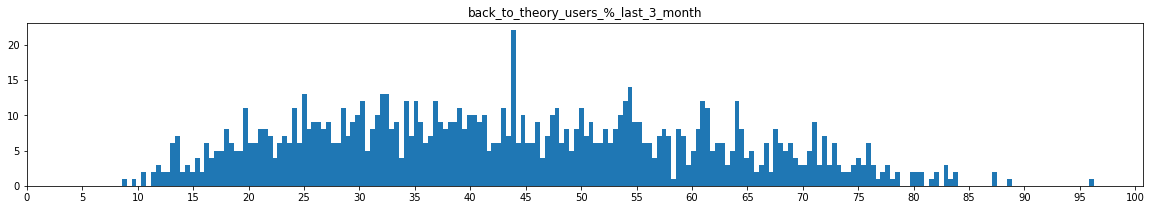

In [31]:
plot_parameter(topics_20_completions, 'back_to_theory_users_%_last_3_month', ticks=5, bins=200)